# 1.Download the datset from https://www.kaggle.com/datasets/mansoordaku/ckdisease <br>
# 2.The link which sir gave doesn't follow appropriate arff file format <br>
# 3.Please ensure the downloaded zip file is in same location as this python notebook

In [61]:
!unzip archive.zip

Archive:  archive.zip
  inflating: kidney_disease.csv      


In [62]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from scipy.spatial.distance import minkowski as mink
from scipy.spatial.distance import canberra as canb
from scipy.spatial.distance import russellrao as rusr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [63]:
# Loading the data and dropping the index axis
df = pd.read_csv('kidney_disease.csv')
df  = df.drop(['id'],axis=1)

In [64]:
# separating data into different classes
real = ['sc','pot','hemo','rc','sg']
integer = ['age','bp','bgr','bu','sod','pcv','wc','su','al']
label = ['classification']
binary = list(set(df.columns) - set(real)-set(integer)-set(label))

In [65]:
# Removing parsing errors
df = df.replace('\t?',np.nan)
df = df.replace('\tyes','yes')
df = df.replace(' yes','yes')
df = df.replace('yes\t','yes')
df = df.replace('\tno','no')
df = df.replace('ckd\t','ckd')
df = df.replace('ckd',1)
df = df.replace('notckd',0)

In [66]:
# Filling the null values with appropriate metric.You can also use other statistic like mode or median
for r in real:
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    df[r]=imp_mean.fit_transform(df[r].to_numpy().reshape(-1,1))
for i in integer:
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
    df[i]=imp_mean.fit_transform(df[i].to_numpy().reshape(-1,1))
for b in binary:
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    le= preprocessing.LabelEncoder()
    df[b]=imp_mean.fit_transform(df[b].to_numpy().reshape(-1,1))
    df[b]=le.fit_transform(df[b])

In [67]:
X = df.drop(label,axis=1)
Y = df[label]

In [68]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,38.0,6000.0,4.707435,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.707435,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.900000,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.200000,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.400000,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.900000,0,0,0,0,0,0


In [69]:
#Creating new DataFrame with order:(real,integer,binary) for easy calculations later
new=pd.DataFrame()
new1=X[real].copy()
new2=X[integer].copy()
new3=X[binary].copy()
X=pd.concat([new1,new2,new3],axis=1)
X

,sc,pot,hemo,rc,sg,age,bp,bgr,bu,sod,...,ane,htn,dm,pe,rbc,ba,pc,cad,appet,pcc
0,1.2,4.627244,15.4,5.200000,1.020,48.0,80.0,121.0,36.0,138.0,...,0,1,1,0,1,0,1,0,0,0
1,0.8,4.627244,11.3,4.707435,1.020,7.0,50.0,121.0,18.0,138.0,...,0,0,0,0,1,0,1,0,0,0
2,1.8,4.627244,9.6,4.707435,1.010,62.0,80.0,423.0,53.0,138.0,...,1,0,1,0,1,0,1,0,1,0
3,3.8,2.500000,11.2,3.900000,1.005,48.0,70.0,117.0,56.0,111.0,...,1,1,0,1,1,0,0,0,1,1
4,1.4,4.627244,11.6,4.600000,1.010,51.0,80.0,106.0,26.0,138.0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.5,4.900000,15.7,4.900000,1.020,55.0,80.0,140.0,49.0,150.0,...,0,0,0,0,1,0,1,0,0,0
396,1.2,3.500000,16.5,6.200000,1.025,42.0,70.0,75.0,31.0,141.0,...,0,0,0,0,1,0,1,0,0,0
397,0.6,4.400000,15.8,5.400000,1.020,12.0,80.0,100.0,26.0,137.0,...,0,0,0,0,1,0,1,0,0,0
398,1.0,4.900000,14.2,5.900000,1.025,17.0,60.0,114.0,50.0,135.0,...,0,0,0,0,1,0,1,0,0,0


In [70]:
#Splitting into training set, validation set, test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 1/3, random_state = 0)

In [71]:
#Defining new distance metric
def mydist(u,v):
    distance = mink(u[:len(real)],v[:len(real)])+canb(u[len(real):len(real)+len(integer)],v[len(real):len(real)+len(integer)])+rusr(u[len(real)+len(integer):len(u)],v[len(real)+len(integer):len(u)])
    return distance

In [72]:
#Defining Classifier Algorithm
clf = KNeighborsClassifier(metric=mydist)
clf.fit(X_train, np.ravel(Y_train))

KNeighborsClassifier(metric=<function mydist at 0x7fbbc293b6d0>)

In [73]:
#Calculating Cross Validation Scores
x_axis = []
y_axis = []
for i in range(1, 10, 2):
    clf = KNeighborsClassifier(metric=mydist,n_neighbors = i)
    score = cross_val_score(clf, X_train, np.ravel(Y_train),cv = KFold(2))
    x_axis.append(i)
    y_axis.append(score.mean())

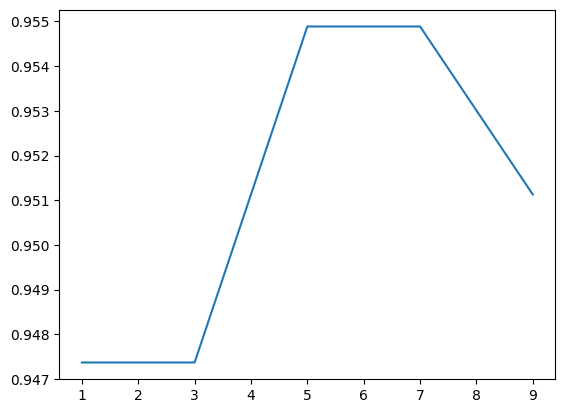

In [74]:
#Plotting k vs validation score graph for visualization
plt.plot(x_axis, y_axis)
plt.show()

In [75]:
y_axis

[0.9473684210526316,
 0.9473684210526316,
 0.9548872180451128,
 0.9548872180451128,
 0.9511278195488722]

# Depending on maximum value in above list, select k
# According to above values, maximum is obtained at k=5,7

In [81]:
#Calculating accuracy scores for tuned k
clf = KNeighborsClassifier(metric=mydist,n_neighbors = 5)
X_train1, X_valid, Y_train1, Y_valid=train_test_split(X_train,Y_train, test_size = 1/2, random_state = 0)
clf.fit(X_train1,np.ravel(Y_train1))
a=clf.score(X_test,Y_test)
a

0.9701492537313433

In [83]:
#Calculating accuracy scores for tuned k
clf = KNeighborsClassifier(metric=mydist,n_neighbors = 7)
clf.fit(X_train1,np.ravel(Y_train1))
b=clf.score(X_test,Y_test)
b

0.9701492537313433

# 1.Submit the below text
# 2.Run the code 
# 3.Don't submit the same value as given here

In [85]:
print("k tuned with validation are",5,7)
print("Respective test errors are",1-a,1-b)

Submit this:
k tuned with validation are 5 7
Respective test errors are 0.02985074626865669 0.02985074626865669
